In [31]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [67]:
df = pd.read_csv("C:\\Users\\Sasha\\Desktop\\Py\\Git\\PracticeModels\\DataAnalysis\\repl1.csv")

In [68]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [69]:
#df['overweight'] = df['weight'] / ((df['height']/100) **2) 
df['overweight'] = [1 if x >25 else 0 for x in df['weight'] / ((df['height']/100) **2)]

In [70]:
df['overweight']

0        0
1        1
2        0
3        1
4        0
        ..
69995    1
69996    1
69997    1
69998    1
69999    0
Name: overweight, Length: 70000, dtype: int64

In [73]:
df['cholesterol'] = [1 if x >1 else 0 for x in df['cholesterol']]
df['gluc'] = [1 if x >1 else 0 for x in df['gluc']]

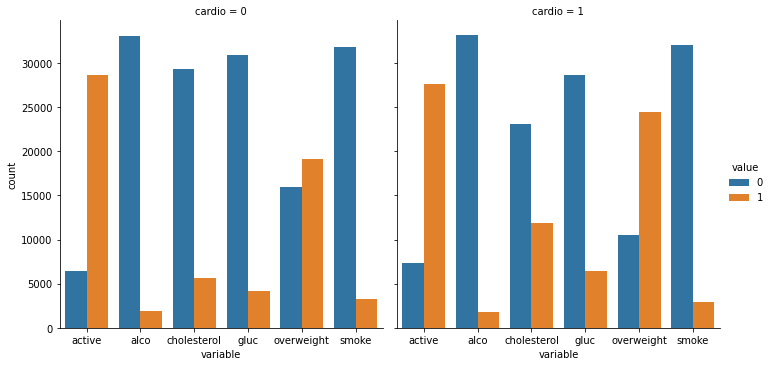

In [74]:
df_cat = pd.melt(df, value_vars=["active", "alco", "cholesterol", "gluc", "overweight", "smoke"], id_vars="cardio")

g = sns.catplot(data=df_cat, kind="count",  x="variable", hue="value", col="cardio")

In [34]:
import seaborn as sns

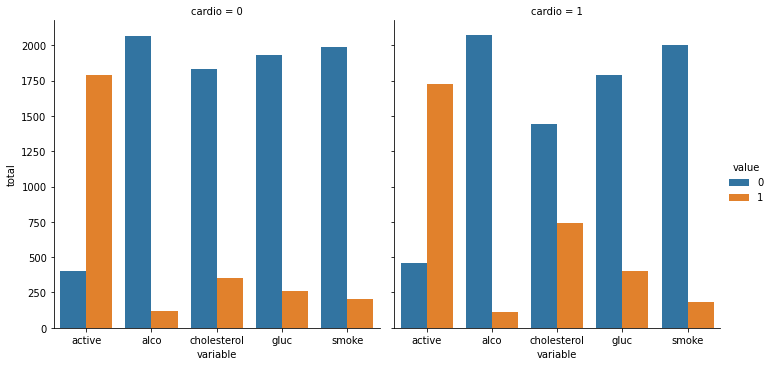

In [35]:
medical_dict = { 1: 0, 2 : 1, 3: 1}
df['cholesterol'] = df['cholesterol'].map( medical_dict )

df['gluc'] = df['gluc'].map( medical_dict ) 

df_cat = df.groupby(["active", "alco", "cholesterol", "gluc", "smoke", 'cardio']).size().rename("total").reset_index().melt(['total', 'cardio'])

sns.catplot(data = df_cat, x='variable', y='total', hue='value', col='cardio', kind="bar", ci = None)

In [75]:
df_heat = df[(df['ap_lo'] <= df['ap_hi']) & 
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) & 
        (df['weight'] <= df['weight'].quantile(0.975))]

In [76]:
corr = df_heat.corr()
corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
gender,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


In [78]:
import numpy as np 

In [79]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

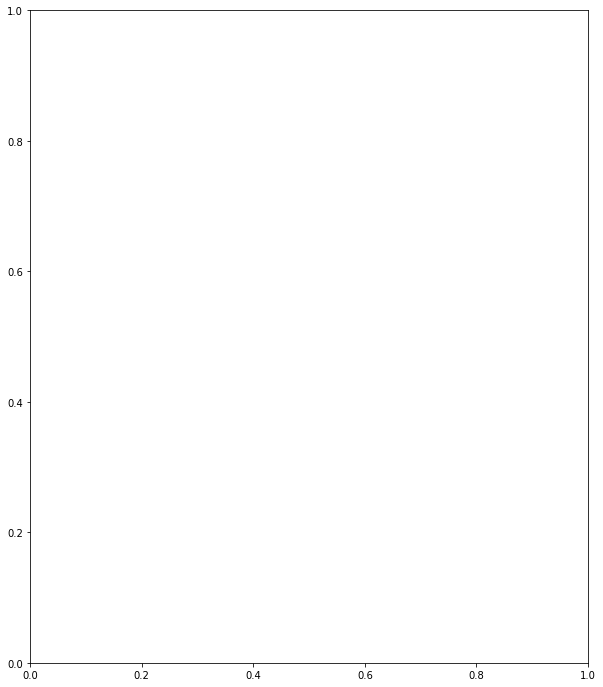

In [80]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 12))

<AxesSubplot:>

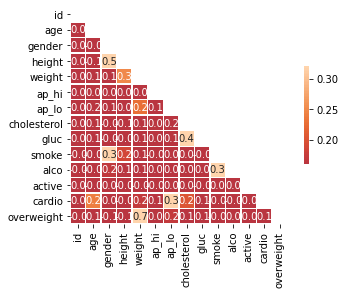

In [81]:
# Draw the heatmap with the mask
sns.heatmap(corr, annot=True, fmt='.1f', mask=mask, vmin=.16, vmax=.32, center=0, square=True, linewidths=.5, cbar_kws={'shrink':.45, 'format':'%.2f'})